In [2]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
import time
import datetime as dt
import matplotlib.gridspec as gridspec



%matplotlib nbagg
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2

from mpl_toolkits.axes_grid1 import make_axes_locatable



In [3]:
# --------------- Latex Plot Beautification --------------------------
fig_width = 4.5 
fig_height = 4
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'legend.fontsize': 10,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

In [4]:
dump = '/shared/users/asousa/software/damping/bin/dump'

alpha = 45
Kp = 4
Ae = 1.6
MLT = 18
modes = [0, 1, 2] 

if not os.path.exists('data'):
    os.mkdir('data')

for mode in modes:
    outname = "data/dump_%d_%d_%d.dat"%(alpha, mode, MLT)
    cmd = "%s --alpha=%d --mode=%d --out_file=%s --Kp=%g --AE=%g --MLT=%g"%(dump, alpha, mode, outname, Kp, Ae, MLT)
    print cmd
    os.system(cmd)



/shared/users/asousa/software/damping/bin/dump --alpha=45 --mode=0 --out_file=data/dump_45_0_18.dat --Kp=4 --AE=1.6 --MLT=18
/shared/users/asousa/software/damping/bin/dump --alpha=45 --mode=1 --out_file=data/dump_45_1_18.dat --Kp=4 --AE=1.6 --MLT=18
/shared/users/asousa/software/damping/bin/dump --alpha=45 --mode=2 --out_file=data/dump_45_2_18.dat --Kp=4 --AE=1.6 --MLT=18


(20224,)
(256,)
(79,)


<IPython.core.display.Javascript object>


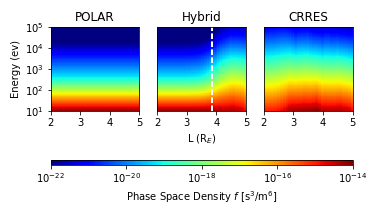

In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


outname = "data/dump_%d_%d_%d.dat"%(alpha, 0, MLT)
d0 = np.loadtxt(outname)
outname = "data/dump_%d_%d_%d.dat"%(alpha, 1, MLT)
d1 = np.loadtxt(outname)
outname = "data/dump_%d_%d_%d.dat"%(alpha, 2, MLT)
d2 = np.loadtxt(outname)

Ls = np.unique(d0[:,0])
Es = np.unique(d0[:,1])

Lpp = 5.39 - 0.382*Kp

# mask = d0[:,0]==4
mask = d0[:,1]==3
data0 = d0[mask,2]
data1 = d1[mask,2]
data2 = d2[mask,2]


print np.shape(d0[:,2])
print np.shape(Es)
print np.shape(Ls)
data_mode0 = np.reshape(d0[:,2].squeeze(), [len(Es), len(Ls)],order='f')
data_mode1 = np.reshape(d1[:,2].squeeze(), [len(Es), len(Ls)],order='f')
data_mode2 = np.reshape(d2[:,2].squeeze(), [len(Es), len(Ls)],order='f')

xlims = [2,5]
clims = [-22, -14]
ylims = [1, 5]

# --------------- Latex Plot Beautification --------------------------
fig_width = 4.25 
fig_height = 2
fig_size =  [fig_width+1,fig_height+1]
params = {'font.family': 'Sans Serif',
          'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'legend.fontsize': 8,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------





# fig, ax = plt.subplots(1,3)
fig = plt.figure()
# fig, ax = plt.subplots(1,4,gridspec_kw = {'width_ratios':[1,1,1,0.1]})
gs = gridspec.GridSpec(2,3,height_ratios=[1,0.05])



gs.update(wspace=0.05, hspace=0.05) # set the spacing between axes.
ax = []
ax.append(plt.subplot(gs[0,0]))
ax.append(plt.subplot(gs[0,1]))
ax.append(plt.subplot(gs[0,2]))
cax = plt.subplot(gs[1,:])
# [a.set_aspect(1) for a in ax]

p0 = ax[0].pcolor(Ls, Es, np.log10(data_mode0), cmap=plt.get_cmap('jet'))
p0.set_clim(clims)
ax[0].set_xlim(xlims)
ax[0].set_ylim(ylims)
ax[0].set_title('POLAR')

p1 = ax[1].pcolor(Ls, Es, np.log10(data_mode2), cmap=plt.get_cmap('jet'))
p1.set_clim(clims)
ax[1].set_xlim(xlims)
ax[1].set_ylim(ylims)
ax[1].set_yticks([])
ax[1].set_title('Hybrid')
ax[1].plot([Lpp, Lpp],[Es[0], Es[-1]],'w', linestyle='dashed', linewidth=2)


p2 = ax[2].pcolor(Ls, Es, np.log10(data_mode1), cmap=plt.get_cmap('jet'))
p2.set_clim(clims)
ax[2].set_xlim(xlims)
ax[2].set_ylim(ylims)
ax[2].set_title('CRRES')
# divider = make_axes_locatable(ax[2])
# cax = divider.append_axes("right",size="4%",pad=0.15)
cb = plt.colorbar(p1, cax=cax, orientation='horizontal')
cb.set_label('Phase Space Density $f$ [s$^3$/m$^6$]')
cticks = np.arange(clims[0],clims[1]+2,2)
cb.set_ticks(cticks)
cticklabels = ['$10^{%d}$'%k for k in cticks]
cb.set_ticklabels(cticklabels)

# fig.colorbar(p2, cax=cax)

ax[2].set_yticks([])

[a.set_xticks(np.arange(xlims[0],xlims[1]+1)) for a in ax]

yticks = np.arange(ylims[0], ylims[1]+1) #ax[0].get_yticks()

yticklabels = ['$10^{%g}$'%k for k in yticks]
ax[0].set_yticks(yticks)
ax[0].set_yticklabels(yticklabels)
ax[0].set_ylabel('Energy (ev)')

ax[1].set_xlabel('L (R$_E$)')
# fig.tight_layout()
gs.tight_layout(fig)

fig.savefig("psd.png",dpi=300)

# plt.figure()
# plt.semilogy(Ls, data0,'r',label='mode 0')
# plt.semilogy(Ls, data1,'g',label='mode 1')
# plt.semilogy(Ls, data2,'b',label='mode 2')
# plt.xlim(2,5)
# plt.grid()